In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import copy
import numpy as np
files= os.listdir("images_training_rev1/images_training_rev1")

206


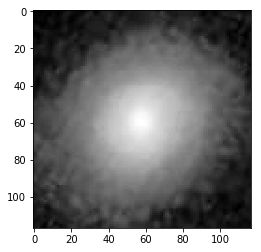

189


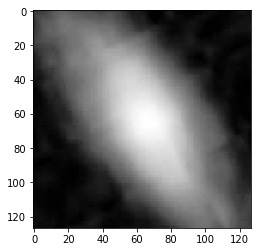

208


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars


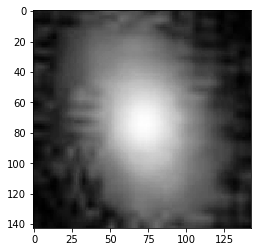

184


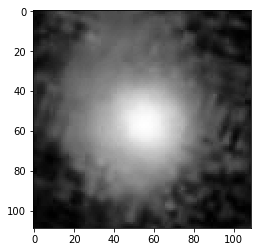

201


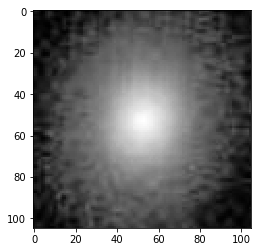

194


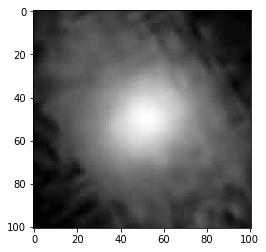

192


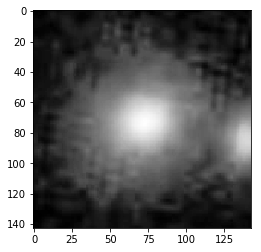

198


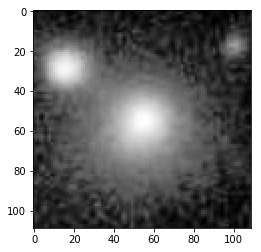

140


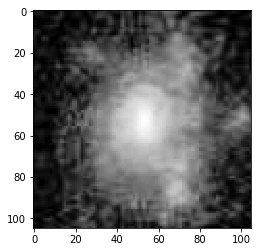

195


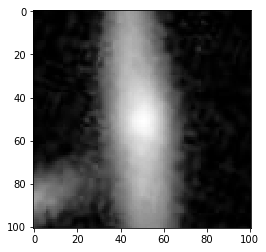

177


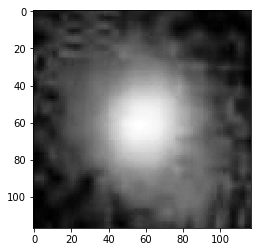

154


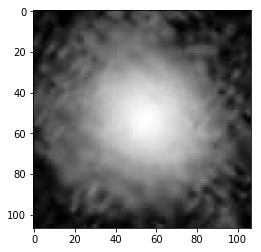

202


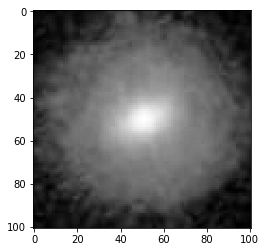

172


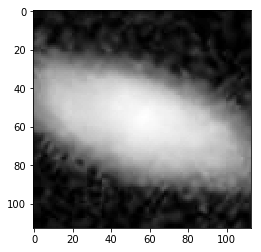

155


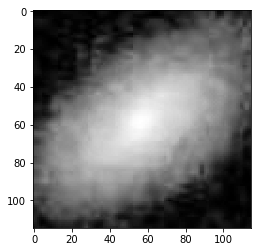

204


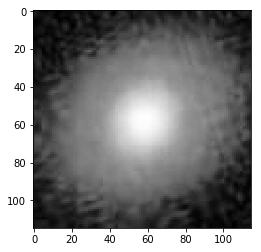

228


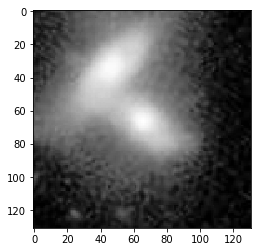

208


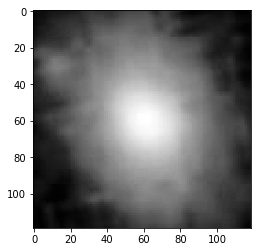

228


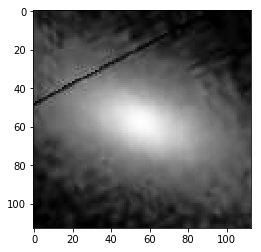

173


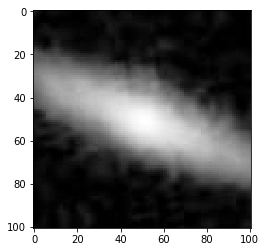

220


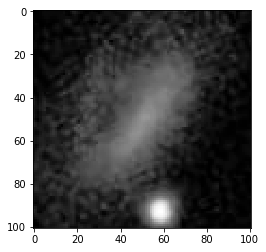

193


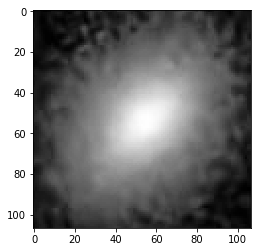

169


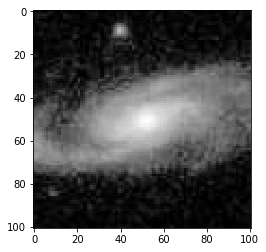

154


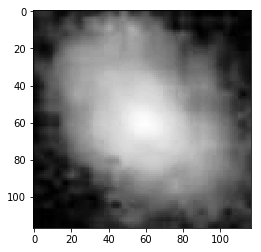

212


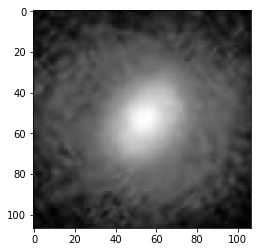

216


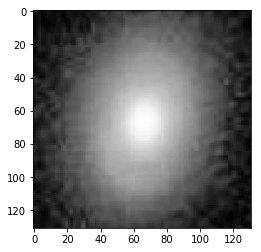

209


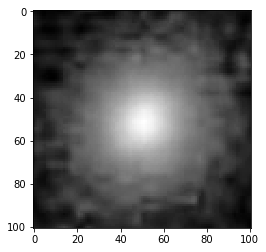

211


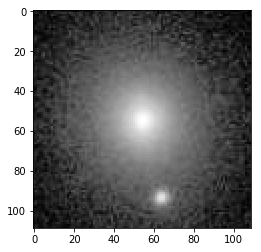

158


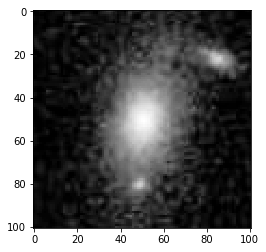

244


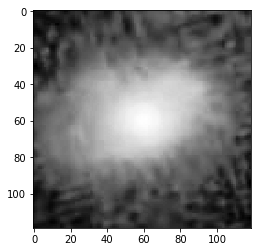

189


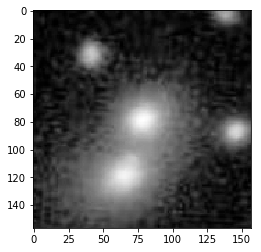

248


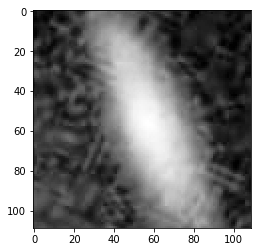

208


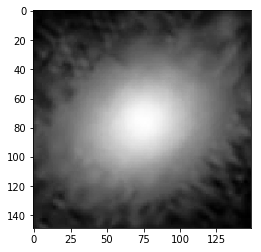

176


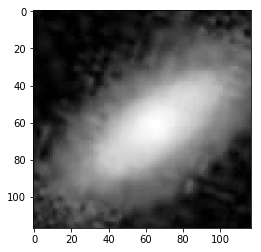

191


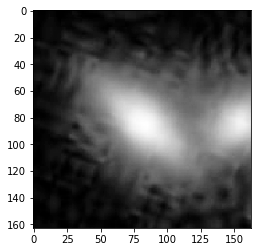

193


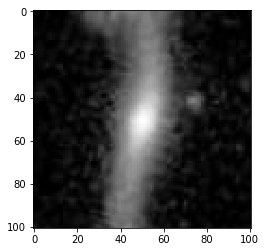

212


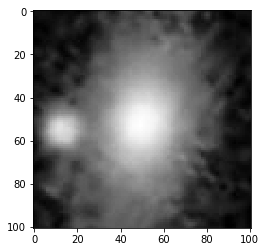

194


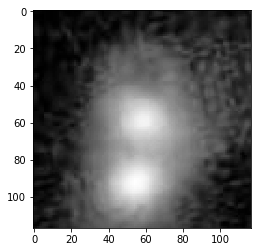

185


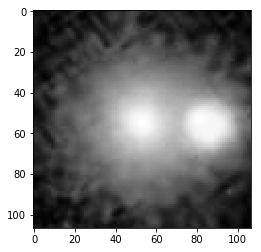

172


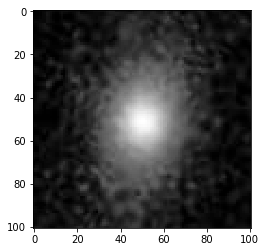

158


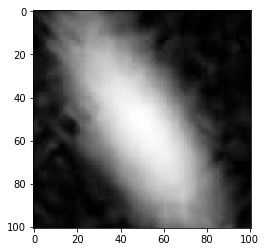

204


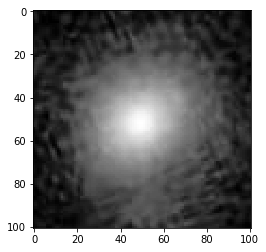

242


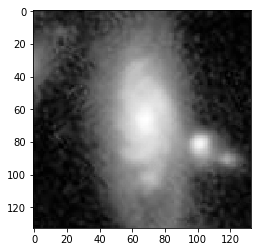

224


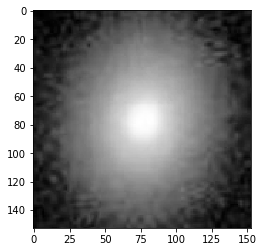

166


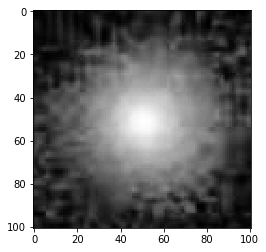

217


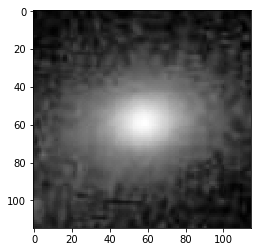

220


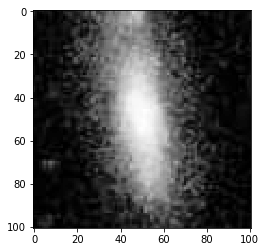

218


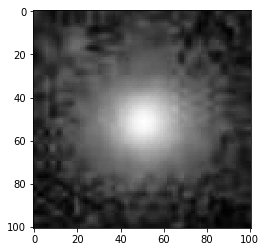

213


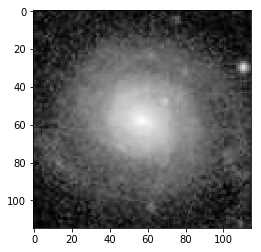

226


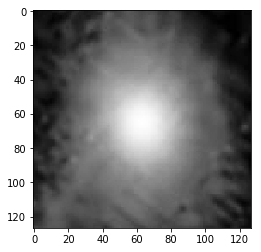

221


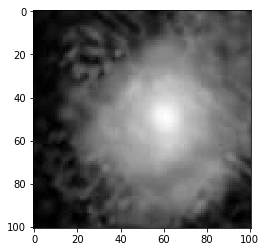

203


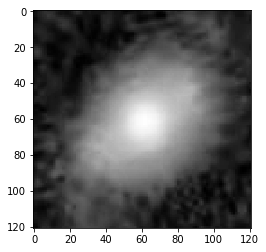

139


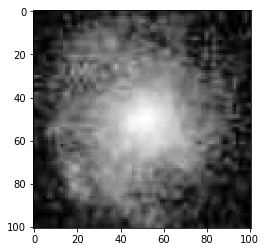

182


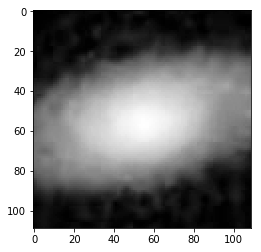

165


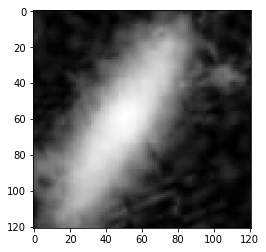

175


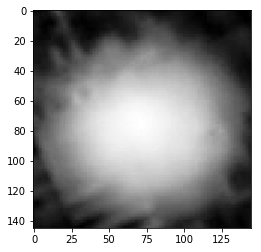

199


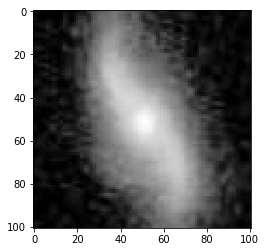

209


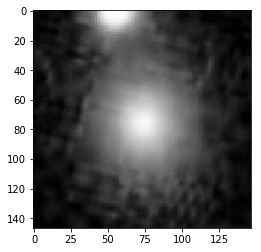

219


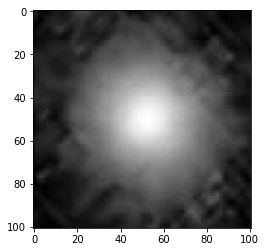

192


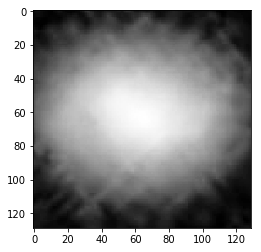

195


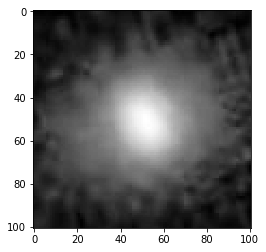

236


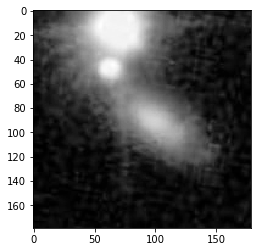

199


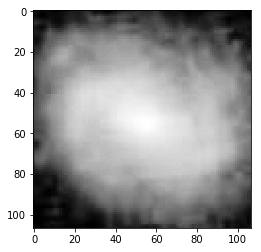

215


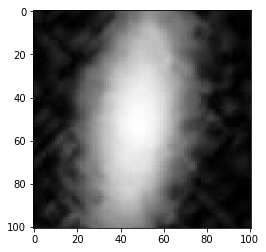

234


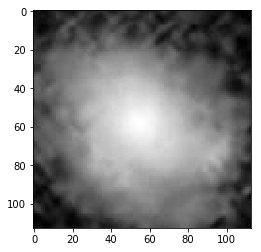

193


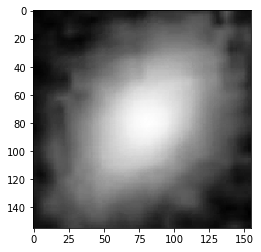

201


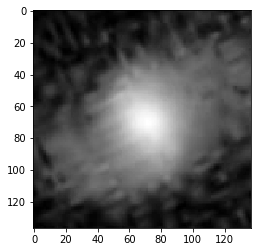

182


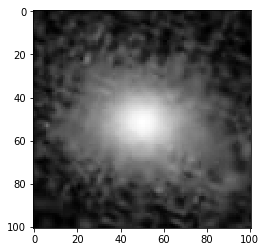

173


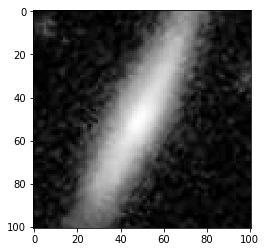

126


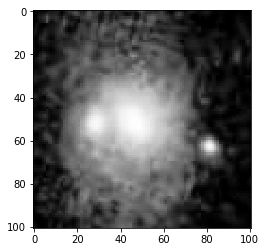

223


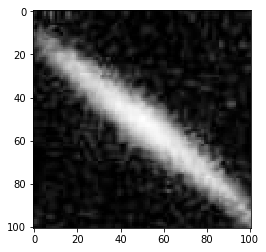

158


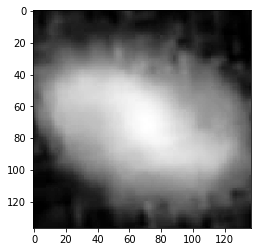

229


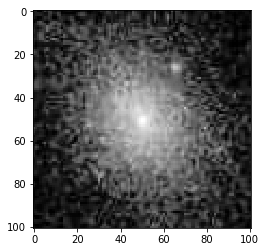

196


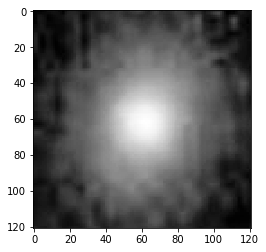

163


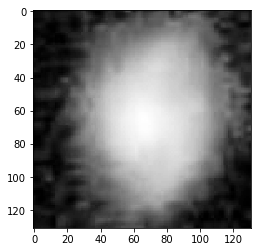

180


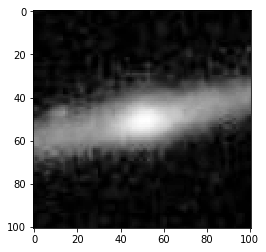

212


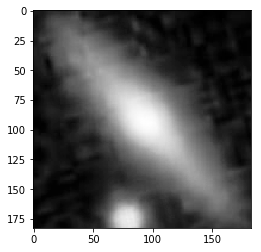

225


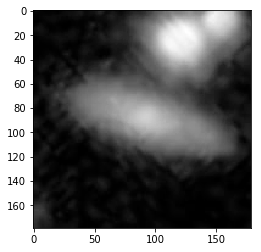

175


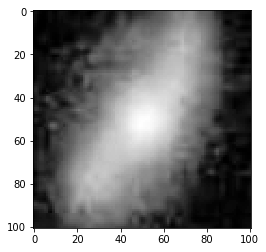

198


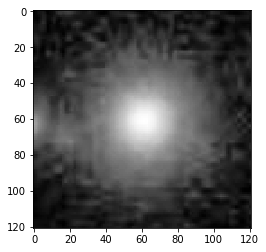

205


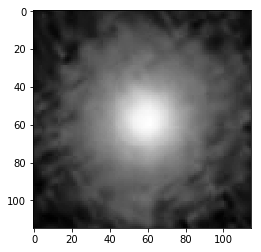

181


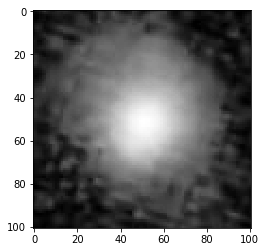

220


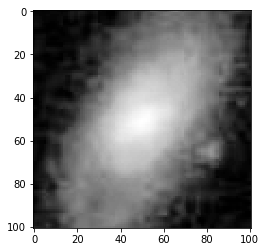

180


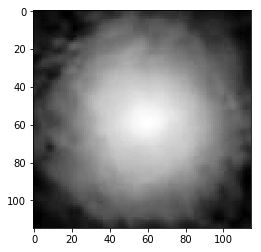

157


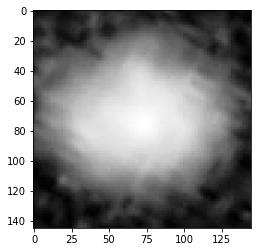

206


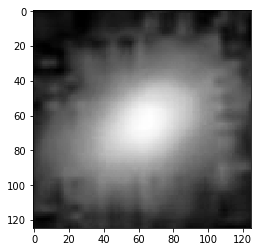

205


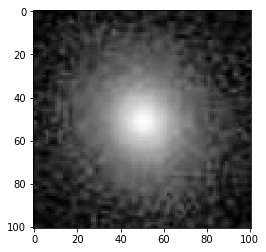

192


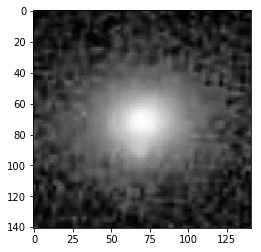

187


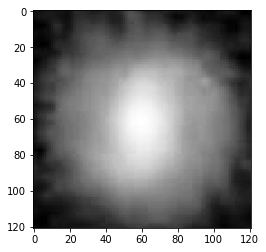

200


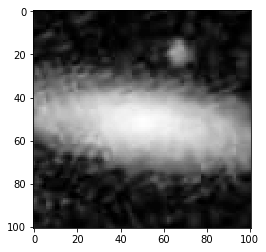

170


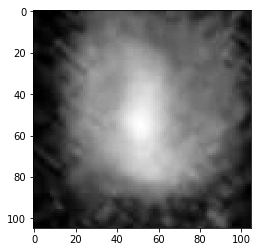

178


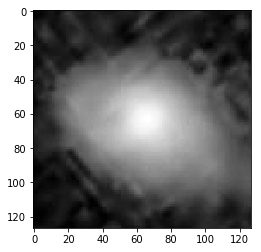

156


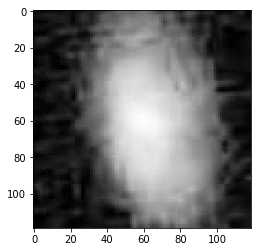

203


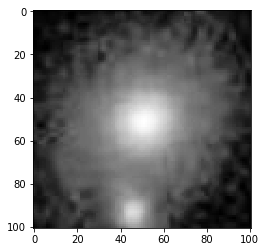

203


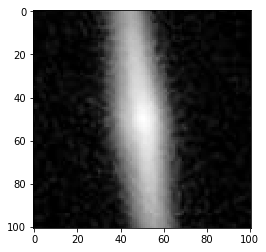

178


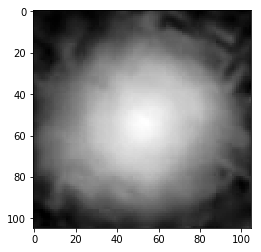

188


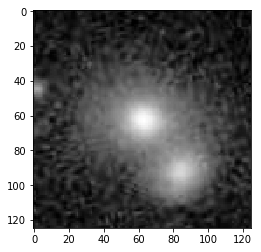

232


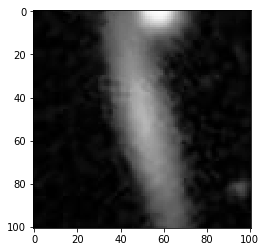

193


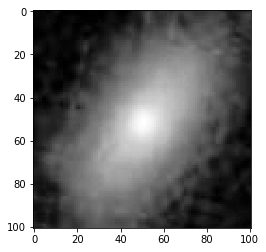

185


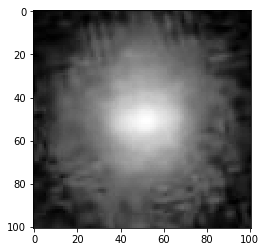

230


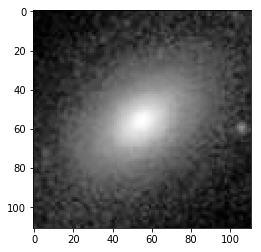

176


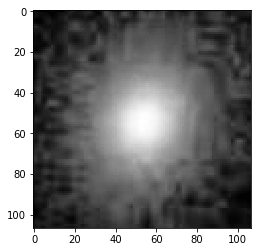

209


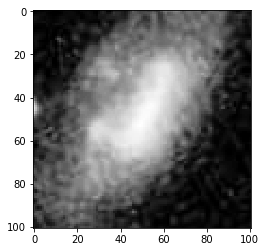

200


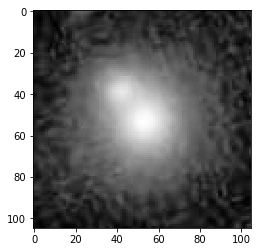

200


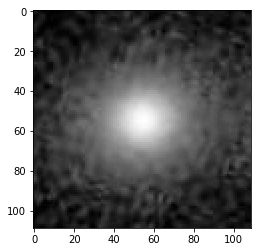

185


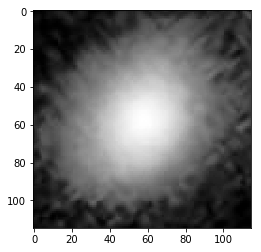

185


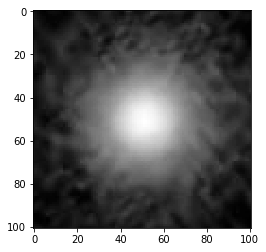

199


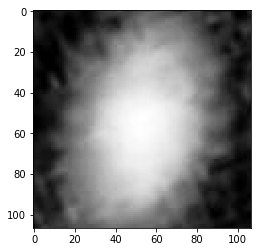

206


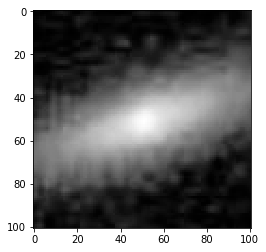

164


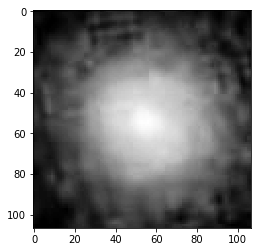

200


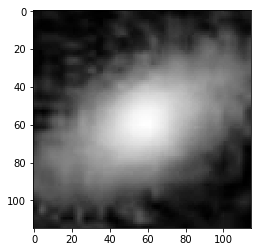

161


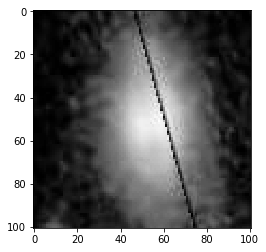

245


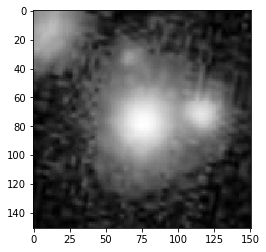

164


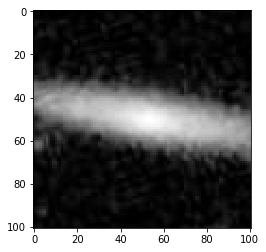

210


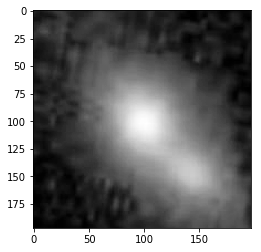

203


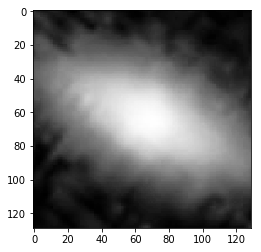

181


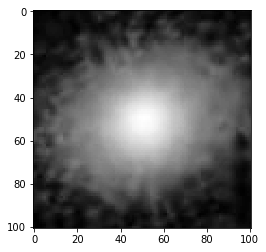

234


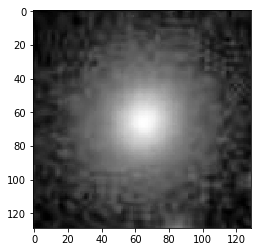

184


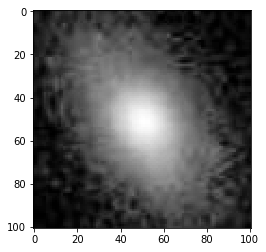

204


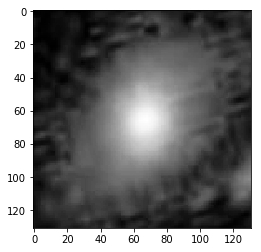

173


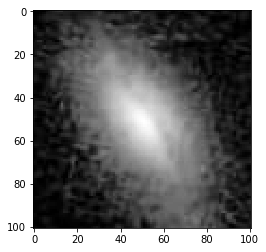

157


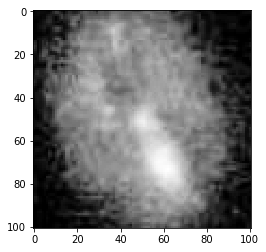

190


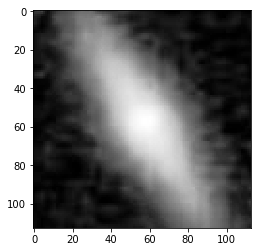

171


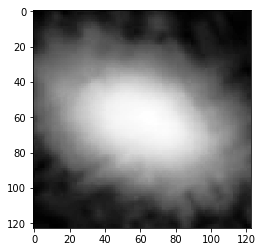

215


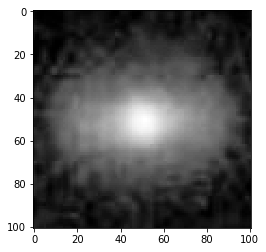

154


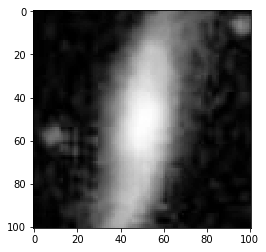

211


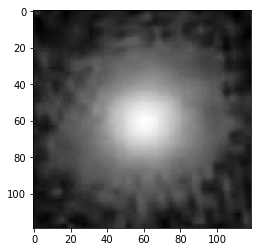

199


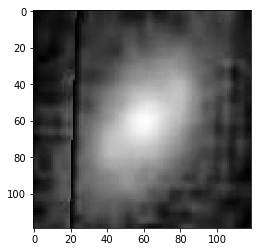

197


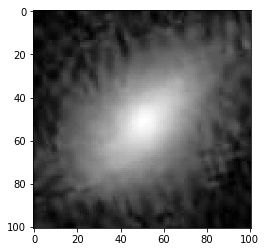

177


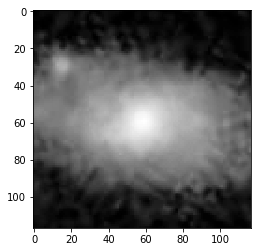

174


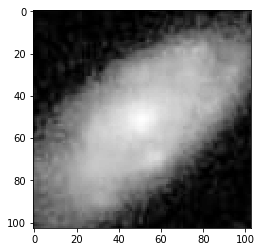

220


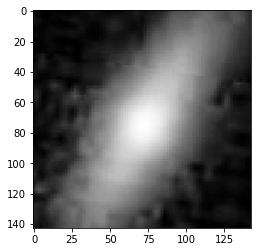

242


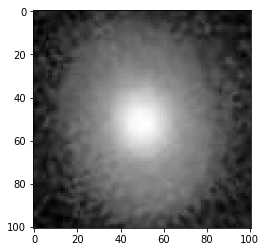

161


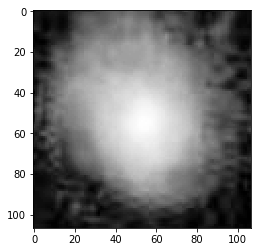

202


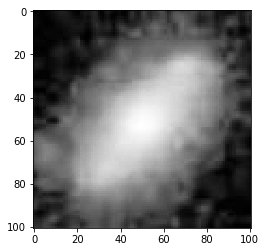

206


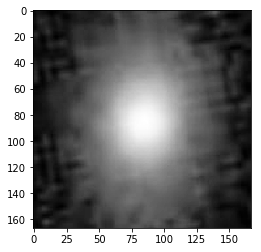

220


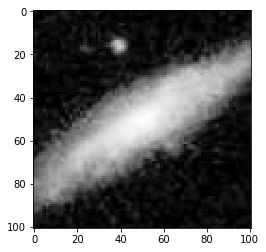

179


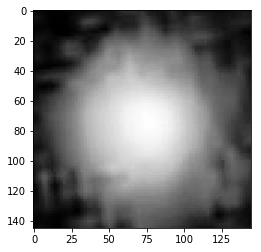

181


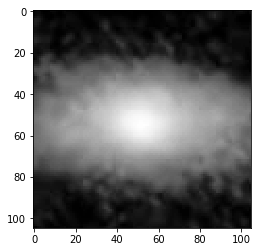

224


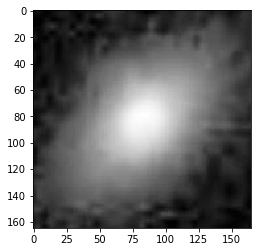

209


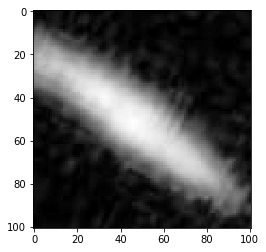

152


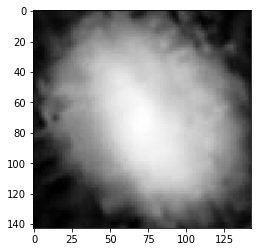

216


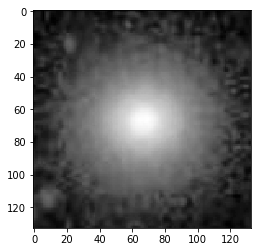

223


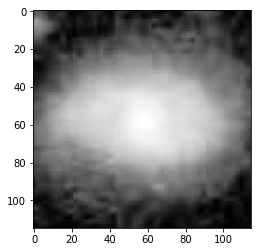

189


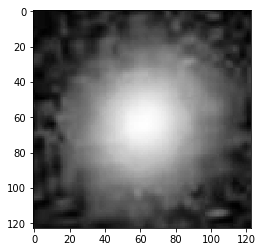

247


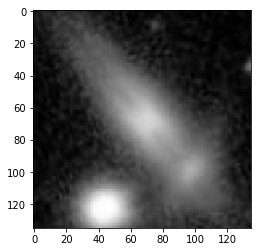

245


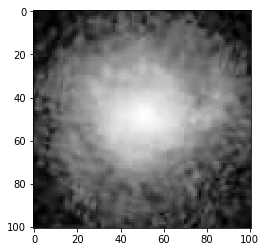

207


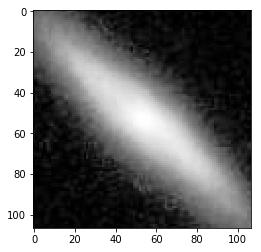

181


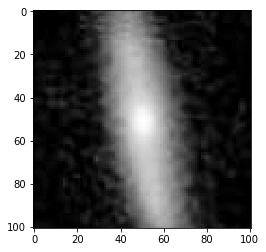

165


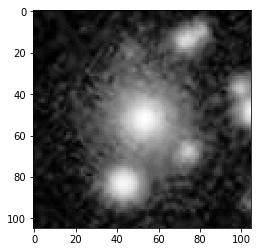

231


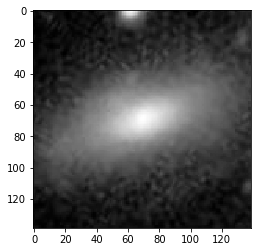

231


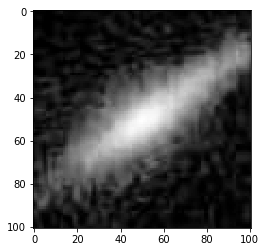

208


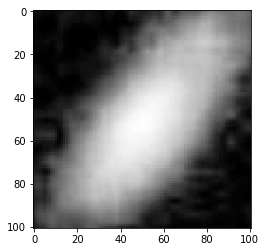

173


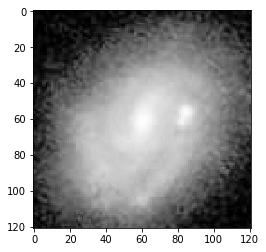

197


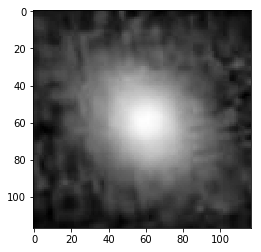

175


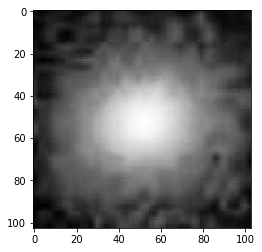

115


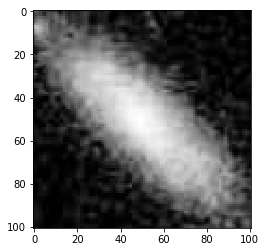

186


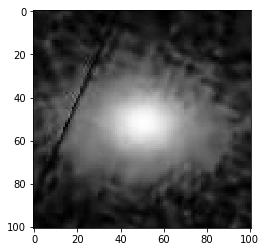

167


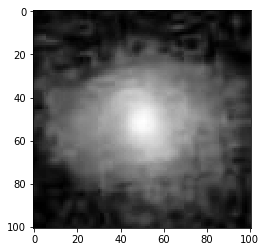

212


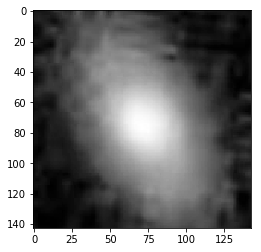

215


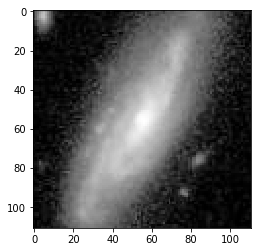

198


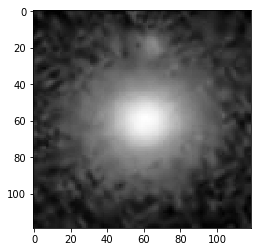

161


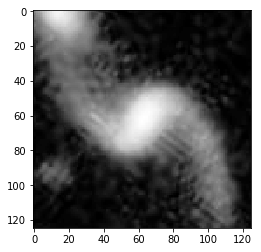

216


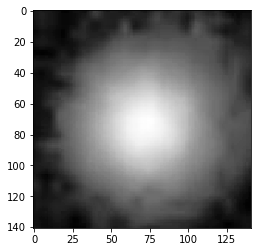

199


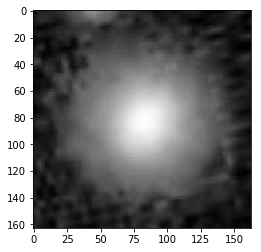

198


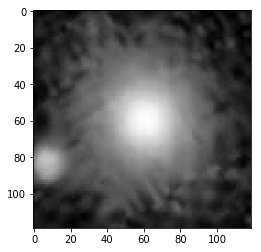

182


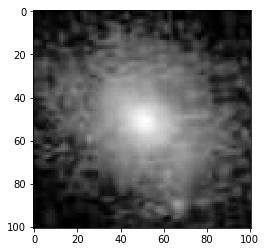

212


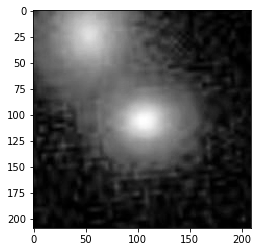

197


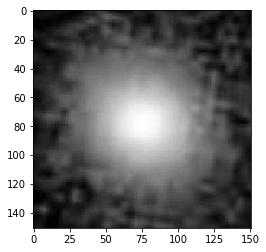

145


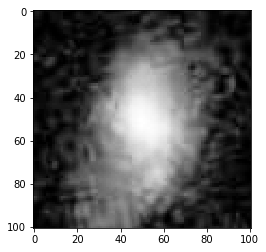

193


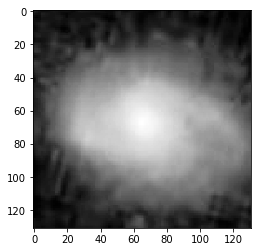

232


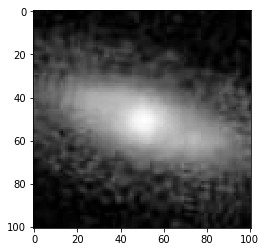

172


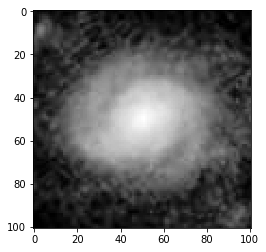

195


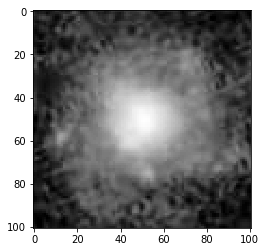

148


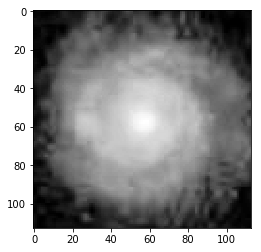

216


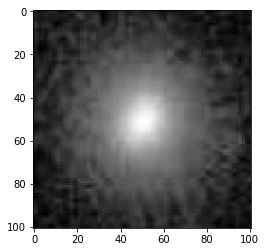

153


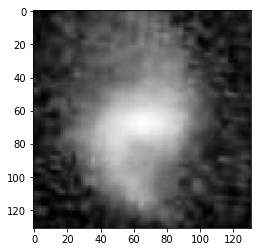

216


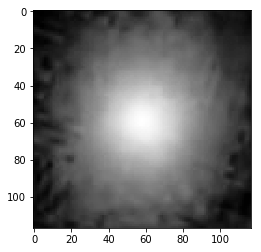

239


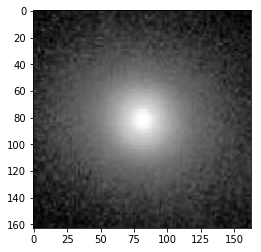

172


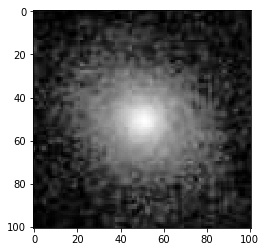

213


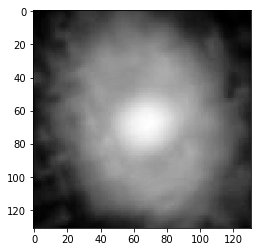

212


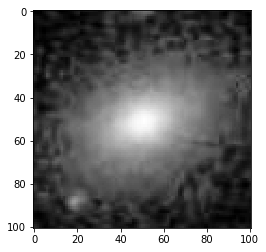

166


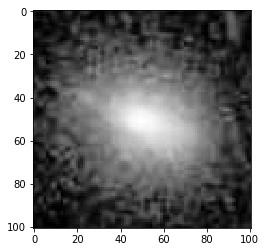

203


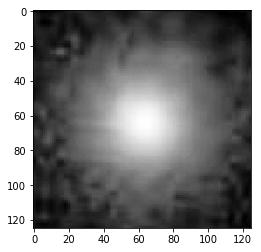

200


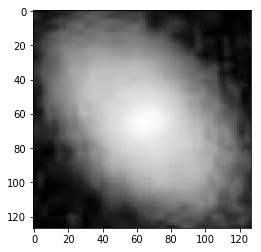

228


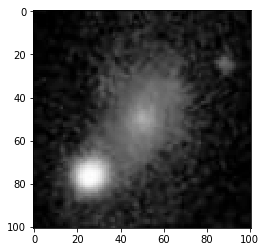

196


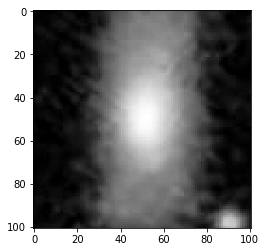

203


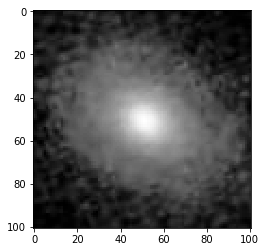

221


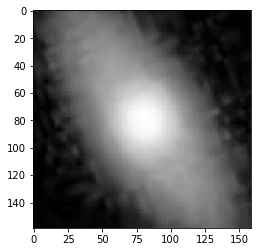

218


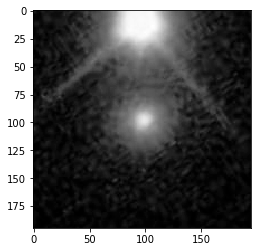

197


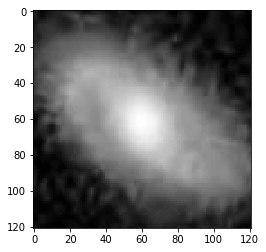

208


KeyboardInterrupt: 

In [53]:
def show_threshold(pix,threshold):
    img = Image.open("images_training_rev1/images_training_rev1/"+filename)
    img = img.convert('L')
    pix = np.array(img)
    for i in range(len(pix)):
        for j in range(len(pix[i])):
            if pix[i,j]<int(threshold):
                pix[i,j]=0
    return pix

def show_image(img):
	imgplot = plt.imshow(img,cmap='Greys_r')
	plt.show()

def save(pix,filepath):
    im = Image.fromarray(pix)
    im.save(filepath)
    
def cropper(pix, threshold):
    xc = 212
    current_window=50
    while True:
        l = max(0, xc - current_window)
        m = min(423, xc + current_window)
        ins = 0
        count = 0
        for k in [l, m]:
            for i in range(l,m+1):
                ins += pix[i,l]+pix[i,m]+pix[l,i]+pix[m,i]
                count+=4
        ins -= pix[l,l]+pix[m,m]+pix[l,m]+pix[m,l]
        count -= 4
        if ins/count>threshold:
            current_window+=1
        else:
            break
    return pix[l:m+1,l:m+1]
    
for filename in files:
    im = Image.open("images_training_rev1/images_training_rev1/"+filename)
    im=im.convert("L")
    pix = np.array(im)
    x,y=im.size
    max_intensity=0
    for x in pix:
        for y in x:
            max_intensity = max(max_intensity, y)
    print(max_intensity)
    crop_pix = cropper(pix, max_intensity/10)
    show_image(crop_pix)

In [ ]:


def cut_window(x_curr,y_curr,pix):
	i,j=0,0
	i=1
	box_intensity=0
	total_points=0
	while x_curr+i<424 and x_curr-i>=0 and y_curr+i<424 and y_curr-i>=0:
		change_intensity=0
		total_border=0
		for k in range(max(y_curr-i+1,0),min(y_curr+i-1,424)):
			change_intensity+=pix[x_curr-i,k]+pix[x_curr+i,k]	
			total_border+=2
		for k in range(max(x_curr-i+1,0),min(x_curr+i-1,424)):
			change_intensity+=pix[k,y_curr-i]+pix[k,y_curr+i]	
			total_border+=2
		change_intensity+=pix[x_curr-i,y_curr-i]+pix[x_curr-i,y_curr+i]+pix[x_curr+i,y_curr-i]+pix[x_curr+i,y_curr+i]
		total_border+=4
		total_points+=total_border
		box_intensity+=change_intensity
		i=i+1
		if (float(change_intensity)/total_border)<threshold:
			break
	#Shade border
	for k in range(max(y_curr-i,0),min(y_curr+i,424)):
		pix[max(x_curr-i,0),k] = 255
		pix[min(x_curr+i,423),k] = 255
	for k in range(max(x_curr-i,0),min(x_curr+i,424)):
		pix[k,max(y_curr-i,0)] = 255
		pix[k,min(y_curr+i,423)] = 255
	imgplot = plt.imshow(im,cmap='Greys_r')
	plt.show()

def blacken(pix,x1,y1,x2,y2):
	for i in range(x1,x2):
		for j in range(y1,y2):
			pix[i,j] = (0,0,0)



# #Open image and get data
# for filename in files:
# 	filename='100367.jpg'
# 	im = Image.open("../images_training_rev1/"+filename)
# 	im=im.convert("L")
# 	pix=im.load()
# 	pix_org=copy.copy()
# 	x,y=im.size
# 	#path="original.jpg"	
# 	#im.save(path)
# 	#Initialize variables to analyse images
# 	freq=[[0,[]] for i in range(255)]
# 	max_intensity=0
# 	tot_intensity=float(0)
# 	#Obtain sum of all pixel intensities, average intensity, and the maximum intensity and most dense region
# 	dense_bd=20
# 	dense_points=[]
# 	curr=(-1,-1)
# 	max_cb=0
# 	for i in range(x):
# 		for j in range(y):
# 			tot_intensity+=pix[i,j]
# 			freq[pix[i,j]][0]+=1
# 			freq[pix[i,j]][1].append((i,j))
# 			if pix[i,j]>max_intensity:
# 				max_intensity=pix[i,j]
# 	for i in range(x):
# 		for j in range(y):
# 			if i<x-dense_bd and j<y-dense_bd:
# 				current_box=0
# 				points=0
# 				for k in range(dense_bd):
# 					for l in range(dense_bd):
# 						current_box+=pix[i+k,j+l]
# 						points+=1			
# 				if float(current_box/points)>max_cb:
# 					max_cb=float(current_box/points)
# 				if current_box/points > (max_intensity/2):
# 					dense_points.append((i,j))
# 	avg_intensity=tot_intensity/(x*y)
# 	#Threshold to crop
# 	threshold=(max_intensity)/10
# 	print(max_cb,dense_points,avg_intensity,max_intensity)
# 	#Increase window size till average intensity drops below threshold
# 	x_curr,y_curr = dense_points[0]
# 	thresh=input()
# 	while thresh:
# 		show_image(show_threshold(pix,thresh))
# 		thresh=input()
# 	cut_window(x_curr+10,y_curr+10,pix)